In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
df = pd.read_csv('./data/adult.txt',header= None,names = ['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race'\
, 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k'] )
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [166]:
df['50k'].value_counts()

 <=50K    24720
 >50K      7841
Name: 50k, dtype: int64

# 문제

## deep learning model을 생성하고 학습하고 평가하시오

In [167]:
df.values

array([[39, ' State-gov', 77516, ..., 40, ' United-States', ' <=50K'],
       [50, ' Self-emp-not-inc', 83311, ..., 13, ' United-States',
        ' <=50K'],
       [38, ' Private', 215646, ..., 40, ' United-States', ' <=50K'],
       ...,
       [58, ' Private', 151910, ..., 40, ' United-States', ' <=50K'],
       [22, ' Private', 201490, ..., 20, ' United-States', ' <=50K'],
       [52, ' Self-emp-inc', 287927, ..., 40, ' United-States', ' >50K']],
      dtype=object)

In [168]:
y= df.values[:,14]
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [169]:
np.unique(y)

array([' <=50K', ' >50K'], dtype=object)

In [170]:
# y는 문자열이므로 label encoding 
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y_enc = enc.fit_transform(y)
y_enc

array([0, 0, 0, ..., 0, 0, 1])

In [171]:
np.unique(y_enc)

array([0, 1])

In [172]:
# from tensorflow.keras.utils import to_categorical
# x_c = tf.keras.utils.to_categorical(x)
# x_c 안되네

In [173]:
# x에 문자열 포함된 거 바꿔주기
df_d = df.drop(columns = ['50k'])
x = df_d
x

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


In [174]:
x = pd.get_dummies(x)
x

,age,fnlwgt,education_num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [175]:
x_1 = x.values
x_1

array([[    39,  77516,     13, ...,      1,      0,      0],
       [    50,  83311,     13, ...,      1,      0,      0],
       [    38, 215646,      9, ...,      1,      0,      0],
       ...,
       [    58, 151910,      9, ...,      1,      0,      0],
       [    22, 201490,      9, ...,      1,      0,      0],
       [    52, 287927,      9, ...,      1,      0,      0]], dtype=int64)

In [176]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x_1,y_enc,random_state=111)

In [177]:
x_train.shape

(24420, 108)

In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [160]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(256,input_dim=108,activation= 'relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    model.summary()
    

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 256)               27904     
                                                                 
 dense_62 (Dense)            (None, 128)               32896     
                                                                 
 dense_63 (Dense)            (None, 64)                8256      
                                                                 
 dense_64 (Dense)            (None, 32)                2080      
                                                                 
 dense_65 (Dense)            (None, 1)                 33        
                                                                 
Total params: 71,169
Trainable params: 71,169
Non-trainable params: 0
_________________________________________________________________


In [180]:
# 훈련
hist = model.fit(x_train_sc, y_train, validation_split=0.2 , epochs=50, batch_size= 20)

Epoch 1/50
977/977 [==============================] - 5s 5ms/step - loss: 0.1209 - accuracy: 0.9438 - val_loss: 0.8679 - val_accuracy: 0.8266
Epoch 2/50
977/977 [==============================] - 5s 5ms/step - loss: 0.1228 - accuracy: 0.9447 - val_loss: 0.8649 - val_accuracy: 0.8217
Epoch 3/50
977/977 [==============================] - 5s 5ms/step - loss: 0.1166 - accuracy: 0.9459 - val_loss: 0.8891 - val_accuracy: 0.8292
Epoch 4/50
977/977 [==============================] - 5s 5ms/step - loss: 0.1140 - accuracy: 0.9466 - val_loss: 1.0530 - val_accuracy: 0.8323
Epoch 5/50
977/977 [==============================] - 5s 5ms/step - loss: 0.1163 - accuracy: 0.9452 - val_loss: 0.8659 - val_accuracy: 0.8229
Epoch 6/50
977/977 [==============================] - 5s 5ms/step - loss: 0.1117 - accuracy: 0.9479 - val_loss: 0.9751 - val_accuracy: 0.8294
Epoch 7/50
977/977 [==============================] - 5s 5ms/step - loss: 0.1131 - accuracy: 0.9478 - val_loss: 1.1476 - val_accuracy: 0.8245
Epoch 

In [181]:
model.evaluate(x_test_sc,y_test) # accuracy 0.829 학습안됨

255/255 [==============================] - 1s 3ms/step - loss: 1.6945 - accuracy: 0.8299


[1.6944849491119385, 0.8298735022544861]

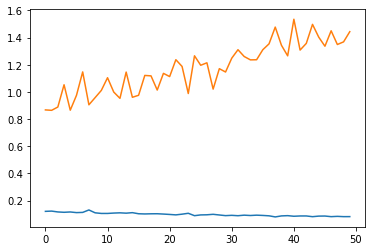

In [182]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

## optimizer parameter바꿔보기: adam -> adagrad

In [188]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test = train_test_split(x_1,y_enc,random_state=111)

In [189]:
with tf.device('/GPU:0'):
    model = Sequential()
    model.add(Dense(256,input_dim=108,activation= 'relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))

    model.add(Dense(32, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adagrad')
    model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 256)               27904     
                                                                 
 dense_72 (Dense)            (None, 128)               32896     
                                                                 
 dense_73 (Dense)            (None, 64)                8256      
                                                                 
 dense_74 (Dense)            (None, 32)                2080      
                                                                 
 dense_75 (Dense)            (None, 1)                 33        
                                                                 
Total params: 71,169
Trainable params: 71,169
Non-trainable params: 0
_________________________________________________________________


In [190]:
hist = model.fit(x_train_sc, y_train,validation_split=0.2, epochs=50, batch_size =20)

Epoch 1/50
977/977 [==============================] - 5s 5ms/step - loss: 0.4996 - accuracy: 0.7667 - val_loss: 0.3975 - val_accuracy: 0.8200
Epoch 2/50
977/977 [==============================] - 4s 4ms/step - loss: 0.3807 - accuracy: 0.8298 - val_loss: 0.3510 - val_accuracy: 0.8421
Epoch 3/50
977/977 [==============================] - 4s 4ms/step - loss: 0.3538 - accuracy: 0.8383 - val_loss: 0.3372 - val_accuracy: 0.8493
Epoch 4/50
977/977 [==============================] - 4s 4ms/step - loss: 0.3433 - accuracy: 0.8415 - val_loss: 0.3310 - val_accuracy: 0.8493
Epoch 5/50
977/977 [==============================] - 4s 4ms/step - loss: 0.3370 - accuracy: 0.8432 - val_loss: 0.3272 - val_accuracy: 0.8544
Epoch 6/50
977/977 [==============================] - 4s 4ms/step - loss: 0.3329 - accuracy: 0.8443 - val_loss: 0.3250 - val_accuracy: 0.8507
Epoch 7/50
977/977 [==============================] - 4s 4ms/step - loss: 0.3295 - accuracy: 0.8463 - val_loss: 0.3229 - val_accuracy: 0.8503
Epoch 

In [191]:
model.evaluate(x_test_sc,y_test)

255/255 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8511


[0.3274618685245514, 0.8511239290237427]

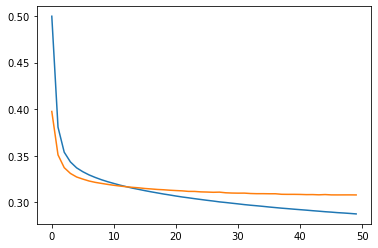

In [192]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FwB6fB%2Fbtq9Y4Zo3cR%2F2N4VZHZWFH2QkEfkQdhhmk%2Fimg.png)

## machine learning과 비교해보시오

In [193]:
df.shape

(32561, 15)

In [194]:
# y = df['50k'].apply(lambda x : 1 if x == ' >50K' else 0)
# x= df.iloc[:,:14]

In [195]:
x = pd.get_dummies(x)

In [196]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state =111)

In [197]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8550591125441425